In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/
# !ls

/content/drive/MyDrive


## Opis problema
TODO dodati detaljan opis

I deo
Predikcija WS (Win Share) za igrace...
https://www.basketball-reference.com/about/ws.html

II deo
Klasifikacija igraca prema poziciji/ulozi u timu

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
TODO kratak opis dataseta

In [156]:
data = pd.read_csv('NBA_Season_Data.csv')

# data.head()
# data.tail()
data.iloc[0:50,:]

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,8.0,25.8,17.0,6.8,0.9,1.1,13.5,23.3,NaN,1.5,5.0,6.5,0.086,NaN,-1.4,0.2,-1.2,0.7,0.020,0.066,20.2,robintr01,-1.61,19780,82,0.0,0.505,331339,0.512,-1.73,...,1.5,0.1,0.4,-1.6,0.9,44.4,42.3,-1.3,-1.2,0.6,0.6,-1.5,-1.4,0.2,0.2,0.1,0.1,0.4,0.4,"$3,900,000","$3,900,000",3.2,0.7,0.60,1.6,"$8,800,000",0.4,"$2,900,000",1.6,0.6,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,3.6,6.4,5.0,22.2,2.4,0.2,12.8,26.8,NaN,6.1,1.7,7.9,0.114,NaN,2.8,-1.2,1.6,3.0,0.089,0.025,23.4,smithra01,-3.25,19805,82,0.0,0.518,332955,0.517,0.52,...,1.5,-1.1,-0.8,4.4,0.8,40.4,38.5,1.8,1.5,3.1,3.1,3.1,2.6,4.0,4.0,-1.3,-1.1,-0.8,-0.8,"$16,200,000","$16,200,000",2.1,1.9,0.73,2.8,"$14,800,000",2.7,"$14,200,000",8.5,10.8,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,10.2,22.7,16.4,6.5,1.3,2.4,12.3,21.6,NaN,3.5,4.8,8.3,0.123,NaN,0.1,1.2,1.3,2.7,0.052,0.071,18.9,hayesel01,0.70,19830,82,0.0,0.506,336086,0.510,-1.31,...,1.5,1.0,1.3,-1.2,0.8,40.1,38.2,1.3,1.1,2.7,2.8,0.1,0.1,1.5,1.5,1.3,1.0,1.3,1.3,"$14,200,000","$14,400,000",2.6,1.9,0.73,2.8,"$14,700,000",2.4,"$12,700,000",7.4,3.9,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,8.0,25.6,17.0,15.7,1.4,1.1,13.9,18.8,NaN,6.1,4.8,10.8,0.162,NaN,1.8,2.1,4.0,4.8,0.091,0.071,16.2,cowenda01,-1.68,19830,82,0.0,0.505,332440,0.500,2.36,...,1.5,2.0,2.3,-0.6,0.8,41.8,39.7,4.4,3.6,5.2,5.5,1.9,1.5,2.9,3.1,2.5,2.0,2.3,2.4,"$26,100,000","$27,700,000",2.6,3.6,0.73,4.0,"$20,600,000",4.6,"$23,400,000",14.0,7.9,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,7.8,24.7,16.4,13.4,1.4,2.0,15.8,26.1,NaN,6.9,4.0,10.9,0.165,NaN,2.4,0.8,3.1,4.1,0.104,0.061,22.0,mcadobo01,-0.47,20005,82,0.0,0.528,333391,0.518,1.37,...,1.5,0.7,1.0,1.6,0.8,40.3,38.3,3.4,2.7,4.3,4.5,2.5,2.0,3.3,3.5,0.9,0.7,1.0,1.0,"$21,800,000","$22,600,000",2.5,3.0,0.73,3.6,"$18,500,000",3.9,"$19,900,000",11.6,9.0,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0
5,1978,NJN,Bernard King,21,79,3092,17.3,0.511,NaN,0.277,7.9,16.0,11.8,9.9,1.7,0.6,14.3,26.0,NaN,2.6,3.3,5.9,0.092,NaN,1.0,0.0,0.9,2.3,0.041,0.051,22.3,kingbe01,-4.89,19905,82,0.0,0.485,332793,0.478,-0.22,...,1.5,-0.1,0.1,1.3,0.8,39.1,37.3,1.0,0.8,2.3,2.4,1.2,0.9,2.2,2.3,-0.2,-0.1,0.1,0.1,"$12,200,000","$12,600,000",1.6,1.3,0.69,2.3,"$11,900,000",2.1,"$10,900,000",6.2,6.0,0.2,5.5,2.8,3.0,21.16,0.0,79.0,205.0,3.0,21.0
6,1978,CHI,Artis Gilmore,28,82,3067,23.5,0.604,NaN,0.531,11.3,26.6,19.0,14.0,0.6,3.2,19.1,25.3,NaN,7.8,3.7,11.5,0.180,NaN,3.2,1.0,4.2,4.8,0.122,0.058,20.5,gilmoar01,-0.79,19755,82,0.0,0.524,327657,0.505,2.58,...,1.5,0.9,1.2,2.1,0.8,37.4,35.7,4.6,3.5,5.1,5.1,3.3,2.6,3.9,3.9,1.2,0.9,1.2,1.2,"$25,600,000","$25,600,000",1.9,3.3,0.73,3.9,"$19,700,000",4.8,"$24,000,000",13.7,10.6,3.2,12.8,5.0,5.0,28.36,6.0,86.0,240.0,5.0,28.0
7,1978,DEN,David Thompson,23,80,3025,23.2,0.578,NaN,0.422,5.5,7.7,6.6,19.3,1.3,1.7,11.5,26.8,NaN,10.8,1.9,12.7,0.202,NaN,4.6,-1.4,3.2,4.0,0.172,0.030,23.7,thompda01,0.75,19830,82,0.0,0.531,329852,0.517,1.10,...,1.5,-1.1,-0.9,6.6,0.8,37.8,36.0,3.6,2.8,4.3,4.4,5.1,3.9,5.2,5.3,-1.5,-1.1,-0.9,-0.9,"$21,800,000","$22,400,000",2.2,3.0,0.73,3.6,"$18,500,000",4.1,"$20,800,000",11.6,14.1,-2.4,11.1,1.6,2.0,23.56,2.0,76.0,195.0,2.0,24.

In [8]:
data.columns.unique()

Index(['Year', 'Tm', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       ...
       'D-WORP', 'Adjusted WORP', 'Estimated Position', 'BBRef Pos',
       'Age on Feb 1', 'Yrs Experience', 'Height', 'Weight',
       'Rounded Position', 'Rounded Age'],
      dtype='object', length=109)

In [9]:
data.dtypes

Year                  int64
Tm                   object
Player               object
Age                   int64
G                     int64
                     ...   
Yrs Experience      float64
Height              float64
Weight              float64
Rounded Position    float64
Rounded Age         float64
Length: 109, dtype: object

In [10]:
print(data["Player"].unique())
# Tim
print(data["Tm"].unique())

['Truck Robinson' 'Randy Smith' 'Elvin Hayes' ... 'Walter Tavares'
 'Cristiano Felicio' '0']
['NOJ' 'BUF' 'WSB' 'BOS' 'NYK' 'NJN' 'CHI' 'DEN' 'GSW' 'IND' 'KCK' 'HOU'
 'SEA' 'CLE' 'SAS' 'LAL' 'PHI' 'MIL' 'POR' 'PHO' 'DET' 'ATL' 'SDC' 'UTA'
 'DAL' 'LAC' 'SAC' 'MIA' 'CHH' 'MIN' 'ORL' 'TOR' 'VAN' 'WAS' 'MEM' 'NOH'
 'CHA' 'NOK' 'OKC' 'BRK' 'NOP' 'CHO']


In [11]:
# uzimam od sezone 2010/2011 i samo igrace sa preko 21 utakmicu (cevrtina r. sezone)
data  = data[(data["Year"] >= 2010) & (data["G"] > 21)]

data.head()

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
13646,2010,OKC,Kevin Durant,21,82,3239,26.2,0.607,0.210,0.504,3.8,17.9,11.0,13.5,1.8,1.9,11.7,32.0,NaN,11.1,5.0,16.1,0.238,NaN,4.4,0.1,4.6,5.4,0.164,0.074,28.3,duranke01,3.82,19804,82,0.222,0.548,341033,0.526,0.48,...,1.5,0.1,0.4,4.8,0.8,39.5,37.7,5.1,4.2,5.8,5.8,4.9,4.0,5.4,5.4,0.2,0.1,0.4,0.4,"$28,100,000","$28,100,000",3.0,4.1,0.73,4.4,"$21,800,000",5.1,"$25,000,000",15.6,14.6,1.0,13.9,3.6,3.0,21.34,2.0,81.0,240.0,4.0,21.0
13647,2010,PHI,Andre Iguodala,26,82,3193,17.8,0.535,0.271,0.384,3.0,16.8,9.8,23.7,2.3,1.4,14.3,21.8,NaN,4.0,2.8,6.7,0.101,NaN,1.9,0.6,2.5,3.6,0.060,0.041,18.7,iguodan01,-4.43,19805,82,0.222,0.534,341917,0.534,2.77,...,1.5,0.7,0.9,1.0,0.8,38.9,37.1,2.7,2.2,3.8,3.8,1.9,1.5,2.9,2.9,0.8,0.7,0.9,0.9,"$18,700,000","$18,700,000",1.7,2.2,0.73,3.1,"$15,300,000",3.4,"$16,900,000",10.2,7.7,2.5,9.2,2.2,3.0,26.01,5.0,78.0,207.0,2.0,26.0
13648,2010,MEM,Rudy Gay,23,80,3175,16.2,0.535,0.157,0.311,4.2,13.2,8.7,7.8,1.9,1.5,10.3,22.5,NaN,4.0,2.4,6.4,0.096,NaN,0.5,-0.2,0.3,1.8,0.060,0.036,20.2,gayru01,-1.49,19905,82,0.222,0.536,343290,0.536,-1.63,...,1.5,-0.2,0.0,0.9,0.8,39.7,37.8,0.4,0.3,1.9,2.0,0.7,0.5,1.9,1.9,-0.2,-0.2,0.0,0.0,"$10,000,000","$10,200,000",2.2,1.2,0.69,2.2,"$11,400,000",1.7,"$8,800,000",5.2,5.1,0.1,4.5,3.2,3.0,23.46,3.0,80.0,230.0,3.0,24.0
13649,2010,CHA,Gerald Wallace,27,76,3119,18.3,0.586,0.148,0.577,5.9,23.2,14.7,9.0,2.0,2.2,13.1,20.3,NaN,5.3,6.2,11.5,0.177,NaN,0.5,2.7,3.1,4.0,0.082,0.095,17.6,wallage01,1.22,19879,82,0.222,0.538,337753,0.528,-0.57,...,1.5,2.3,2.5,-2.3,0.8,41.0,39.0,3.5,2.7,4.3,4.7,0.6,0.5,1.8,2.0,2.9,2.3,2.5,2.7,"$21,200,000","$22,800,000",2.9,3.2,0.73,3.8,"$18,700,000",4.0,"$19,700,000",11.7,4.9,6.7,10.8,3.3,3.0,27.53,8.0,79.0,215.0,3.0,28.0
13650,2010,MEM,O.J. Mayo,22,82,3113,14.6,0.551,0.300,0.221,2.3,9.4,5.8,12.2,1.6,0.4,11.9,20.7,NaN,4.3,1.4,5.6,0.087,NaN,1.6,-1.1,0.4,1.9,0.066,0.021,18.2,mayooj01,-1.49,19905,82,0.222,0.536,343290,0.533,-1.15,...,1.5,-1.0,-0.7,2.9,0.8,38.0,36.2,0.4,0.3,1.9,1.9,1.7,1.3,2.6,2.6,-1.3,-1.0,-0.7,-0.7,"$9,800,000","$9,800,000",1.9,1.1,0.66,2.0,"$10,600,000",1.6,"$8,500,000",5.1,7.1,-2.0,4.3,2.0,2.0,22.24,1.0,77.0,210.0,2.0,22.0


In [12]:
data.loc[data["Player"] == "Carmelo Anthony"]

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
13688,2010,DEN,Carmelo Anthony,25,69,2634,22.2,0.548,0.125,0.407,6.7,13.1,9.9,15.9,1.7,0.9,10.6,33.4,NaN,5.6,2.4,7.9,0.145,NaN,2.5,-1.0,1.5,2.3,0.102,0.043,29.9,anthoca01,4.20,19782,82,0.222,0.561,345235,0.564,1.82,...,1.6,-0.8,-0.6,3.9,0.7,38.2,36.1,1.4,0.9,2.3,2.7,2.7,1.8,2.9,3.4,-1.3,-0.8,-0.6,-0.8,"$11,600,000","$13,600,000",2.7,2.0,0.73,2.9,"$14,500,000",2.5,"$12,500,000",6.1,7.8,-1.7,6.6,3.1,3.0,25.68,6.0,80.0,230.0,3.0,26.0
14294,2011,DEN,Carmelo Anthony,26,50,1774,21.2,0.547,0.130,0.431,5.2,19.3,12.4,14.3,1.2,1.3,11.0,32.5,NaN,2.8,1.9,4.7,0.127,NaN,0.9,-0.7,0.3,1.0,0.076,0.051,28.9,anthoca01,4.89,19705,82,0.222,0.574,342569,0.578,1.14,...,1.6,-0.3,-0.2,1.6,0.5,35.5,32.9,0.1,0.1,1.0,1.6,0.9,0.4,1.2,1.9,-0.7,-0.3,-0.2,-0.3,"$5,500,000","$8,400,000",2.1,1.1,0.67,2.1,"$10,700,000",1.4,"$7,700,000",2.6,3.2,-0.5,3.9,3.3,3.0,26.68,7.0,80.0,230.0,3.0,27.0
14410,2011,NYK,Carmelo Anthony,26,27,977,22.8,0.575,0.233,0.351,4.8,16.5,10.6,15.3,1.3,1.1,9.4,31.0,NaN,2.6,0.6,3.2,0.157,NaN,3.3,-2.2,1.0,0.7,0.128,0.029,28.1,anthoca01,0.51,19780,82,0.222,0.561,345757,0.560,1.09,...,1.8,-0.6,-0.5,5.9,0.2,36.2,31.5,1.2,0.3,0.8,2.4,3.5,0.9,1.3,3.9,-2.3,-0.6,-0.5,-1.5,"$4,700,000","$12,200,000",1.2,1.2,0.68,2.2,"$11,100,000",2.2,"$11,100,000",2.1,3.5,-1.4,5.8,3.2,3.0,26.68,7.0,80.0,230.0,3.0,27.0
14761,2012,NYK,Carmelo Anthony,27,55,1876,21.1,0.525,0.198,0.358,5.4,15.9,10.6,21.0,1.7,1.0,10.8,31.8,NaN,3.7,2.6,6.2,0.160,NaN,2.8,0.0,2.8,2.8,0.094,0.066,28.4,anthoca01,2.75,15939,66,0.226,0.533,271484,0.536,2.90,...,1.6,0.0,0.2,2.9,0.6,34.1,31.8,2.9,1.7,2.9,3.5,2.9,1.7,2.7,3.2,0.0,0.0,0.2,0.2,"$14,200,000","$16,800,000",1.6,2.3,0.73,3.1,"$15,100,000",3.6,"$17,200,000",7.8,7.3,0.5,9.6,3.0,3.0,27.68,8.0,80.0,230.0,3.0,28.0
15263,2013,NYK,Carmelo Anthony,28,67,2482,24.8,0.560,0.278,0.344,6.1,15.9,10.8,14.1,1.1,1.1,9.3,35.6,NaN,7.5,2.0,9.5,0.184,NaN,4.4,-2.0,2.4,2.7,0.145,0.039,32.3,anthoca01,4.35,19731,82,0.243,0.550,348288,0.547,0.98,...,1.6,-1.4,-1.2,6.9,0.6,37.0,35.0,2.4,1.5,2.8,3.4,4.7,2.9,4.0,4.9,-2.3,-1.4,-1.2,-1.5,"$13,900,000","$16,700,000",2.5,2.4,0.73,3.2,"$15,900,000",3.2,"$15,800,000",7.5,10.8,-3.3,8.7,3.2,4.0,28.68,9.0,80.0,230.0,3.0,29.0
15739,2014,NYK,Carmelo Anthony,29,77,2982,24.4,0.561,0.253,0.329,5.6,19.4,12.3,15.8,1.7,1.5,9.5,32.4,NaN,8.1,2.5,10.7,0.172,NaN,4.3,-1.0,3.3,4.0,0.131,0.041,29.3,anthoca01,-1.33,19855,82,0.260,0.541,347588,0.534,1.65,...,1.5,-0.7,-0.5,5.6,0.8,38.7,36.8,3.6,2.7,4.2,4.5,4.6,3.5,4.7,5.0,-1.0,-0.7,-0.5,-0.5,"$20,600,000","$21,900,000",2.0,2.9,0.73,3.6,"$17,500,000",4.1,"$19,900,000",11.4,12.8,-1.4,11.0,3.3,4.0,29.68,10.0,80.0,230.0,3.0,30.0
16463,2015,NYK,Carmelo Anthony,30,40,1428,21.5,0.531,0.222,0.294,5.7,16.0,10.7,18.0,1.5,1.0,8.9,32.2,0.0,2.2,0.6,2.9,0.097,0.0,3.5,-2.2,1.4,1.2,0.075,0.022,29.3,anthoca01,-10.30,19855,82,0.268,0.508,341700,0.505,2.09,...,1.7,-0.8,-0.7,5.7,0.4,35.7,32.5,1.4,0.5,1.2,2.5,3.6,1.3,1.9,3.9,-2.2,-0.8,-0.7,-1.4,"$6,700,000","$12,800,000",-0.2,0.6,0.59,1.5,"$8,300,000",2.0,"$10,500,000",3.3,5.1,-1.8,5.4,3.3,3.0,30.68,11.0,80.0,240.0,3.0,31.0


In [13]:
# Dva data seta, jedan za obuku, drugi za proveru
df = data[(data["Year"]) < 2015]
df_test = data[(data["Year"]) == 2015]

In [14]:
df.isnull().sum(axis = 0)

Year                0
Tm                  0
Player              0
Age                 0
G                   0
                   ..
Yrs Experience      0
Height              0
Weight              0
Rounded Position    0
Rounded Age         0
Length: 109, dtype: int64

In [15]:
df.dtypes

Year                  int64
Tm                   object
Player               object
Age                   int64
G                     int64
                     ...   
Yrs Experience      float64
Height              float64
Weight              float64
Rounded Position    float64
Rounded Age         float64
Length: 109, dtype: object

In [16]:
df.describe()

,Year,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,Defense,Val/Shot,Offense,...,OStdErr,Ocontrib,OVORP,DBPM.1,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueTimeVORP,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
count,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,0.0,2025.000000,2025.000000,2025.000000,2025.000000,0.0,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,...,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000,2025.000000
mean,2012.016296,26.640494,57.232099,1373.974321,13.660099,0.526264,0.235228,0.282182,5.470864,14.569580,10.019654,13.163457,1.575259,1.637284,13.712938,18.822370,NaN,1.558716,1.399556,2.958617,0.087676,NaN,-0.750123,-0.126815,-0.874963,0.752790,0.039632,0.048060,16.297185,-0.141975,19088.073580,78.920988,0.234845,0.537326,330039.300741,0.537176,-0.425437,-0.046301,-0.011081,-0.050321,...,1.600593,0.027901,0.640148,-0.136346,1.781580,0.007160,0.114864,-0.675457,0.360099,22.673975,21.104691,-0.949877,0.035951,0.754815,0.836642,-0.814025,0.027901,0.640148,0.725827,-0.136346,0.007160,0.114864,0.110568,-1.107605,-1.019407,0.355768,0.885926,1.030617,2.037827,1.728000,0.310025,2.779457,2.959111,3.004444,27.213111,5.010864,78.945185,218.974815,2.960000,27.297284
std,1.421612,4.176934,18.739304,787.490182,4.389208,0.055969,0.206660,0.150372,3.955730,5.799854,4.567212,9.398678,0.622340,1.544820,4.515510,4.931791,NaN,2.053048,1.163104,2.892478,0.058907,NaN,2.355978,1.605806,2.711344,1.308283,0.052010,0.023325,4.480956,4.972949,1521.216576,6.293126,0.014985,0.019892,26867.406193,0.020156,2.091831,1.002507,0.211344,2.146514,...,0.231125,0.983408,1.185070,1.754673,0.246059,0.706704,0.715195,3.203656,0.204152,8.833935,8.433620,2.930220,1.135103,1.378863,1.597383,2.519007,0.983408,1.185070,1.383246,1.754673,0.706704,0.715195,0.883197,1.901529,2.216410,0.253810,1.214282,1.491034,3.719896,3.198589,1.931493,4.026062,1.351396,1.401749,4.566299,4.068203,3.921595,26.813528,1.399068,4.569351
min,2010.000000,19.000000,22.000000,62.000000,-1.700000,0.220000,0.000000,0.000000,0.000000,3.600000,2.600000,0.400000,0.000000,0.000000,1.800000,3.700000,NaN,-2.500000,-0.200000,-1.500000,-0.150000,NaN,-9.100000,-5.000000,-10.800000,-1.500000,-0.232000,-0.013000,2.400000,-15.460000,15840.000000,66.000000,0.222000,0.483000,270210.000000,0.477000,-6.830000,-2.600000,-0.710000,-8.830000,...,1.300000,-2.500000,-1.700000,-5.400000,1.500000,-2.100000,-2.000000,-11.600000,0.000000,2.600000,2.200000,-12.100000,-2.500000,-1.600000,-2.200000,-9.800000,-2.500000,-1.700000,-1.800000,-5.400000,-2.100000,-2.000000,-3.100000,-5.600000,-8.000000,0.000000,-0.100000,-0.400000,-4.300000,-4.500000,-5.300000,-1.200000,1.000000,1.000000,19.160000,0.000000,0.000000,0.000000,1.000000,19.000000
25%,2011.000000,23.000000,42.000000,701.000000,10.800000,0.496000,0.014000,0.181000,2.200000,9.800000,6.100000,6.400000,1.100000,0.500000,10.700000,15.300000,NaN

In [17]:
# Top 20 WS
df.sort_values("WS", ascending=False).head(20)

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
15229,2013,MIA,LeBron James,28,76,2877,31.6,0.640,0.188,0.395,4.4,20.8,13.1,36.4,2.4,1.9,12.4,30.2,NaN,14.6,4.7,19.3,0.322,NaN,9.0,1.8,10.8,9.2,0.244,0.078,26.5,jamesle01,7.75,19881,82,0.243,0.587,343073,0.572,6.93,...,1.5,1.7,2.0,6.8,0.7,37.9,36.0,11.6,8.4,9.8,10.6,9.2,6.6,7.9,8.5,2.4,1.7,2.0,2.1,"$46,300,000","$49,900,000",3.2,7.7,0.73,7.0,"$33,600,000",9.8,"$46,400,000",26.5,21.2,5.3,26.5,3.0,4.0,28.09,9.0,80.0,240.0,3.0,28.0
15736,2014,OKC,Kevin Durant,25,81,3122,29.8,0.635,0.291,0.477,2.2,18.6,10.8,26.7,1.7,1.5,12.2,33.0,NaN,14.8,4.4,19.2,0.295,NaN,8.0,0.2,8.2,8.0,0.227,0.068,29.0,duranke01,7.04,19804,82,0.260,0.567,340646,0.542,3.57,...,1.5,0.3,0.6,8.0,0.8,38.5,36.7,8.8,7.0,8.5,8.6,8.4,6.6,8.0,8.1,0.4,0.3,0.6,0.6,"$40,500,000","$41,000,000",3.2,6.3,0.73,6.0,"$28,800,000",7.9,"$37,300,000",23.1,21.5,1.5,21.2,3.3,3.0,25.34,6.0,81.0,240.0,3.0,25.0
15215,2013,OKC,Kevin Durant,24,81,3119,28.3,0.647,0.233,0.523,1.8,20.3,11.8,21.7,1.9,2.6,13.7,29.8,NaN,13.6,5.3,18.9,0.291,NaN,5.8,1.2,7.0,7.1,0.209,0.082,25.7,duranke01,9.89,19831,82,0.243,0.580,340070,0.560,2.45,...,1.5,1.1,1.4,4.8,0.8,38.5,36.7,7.7,6.0,7.6,7.7,6.2,4.9,6.2,6.3,1.4,1.1,1.4,1.4,"$36,100,000","$36,600,000",3.6,5.8,0.73,5.7,"$27,300,000",7.0,"$33,400,000",20.5,16.8,3.7,18.9,3.5,3.0,24.34,5.0,81.0,240.0,4.0,24.0
13656,2010,CLE,LeBron James,25,76,2966,31.1,0.604,0.253,0.506,3.0,18.5,11.1,41.8,2.2,2.0,12.3,33.5,NaN,13.3,5.2,18.5,0.299,NaN,9.8,2.1,11.8,10.4,0.215,0.084,29.4,jamesle01,6.82,19780,82,0.222,0.570,342501,0.558,7.09,...,1.5,2.1,2.3,6.9,0.7,39.0,37.1,12.5,9.4,10.9,11.7,9.7,7.3,8.6,9.2,2.8,2.1,2.3,2.5,"$51,900,000","$55,900,000",3.3,8.3,0.73,7.5,"$36,000,000",10.5,"$50,200,000",29.4,23.1,6.2,28.4,2.7,3.0,25.09,6.0,80.0,240.0,3.0,25.0
13646,2010,OKC,Kevin Durant,21,82,3239,26.2,0.607,0.210,0.504,3.8,17.9,11.0,13.5,1.8,1.9,11.7,32.0,NaN,11.1,5.0,16.1,0.238,NaN,4.4,0.1,4.6,5.4,0.164,0.074,28.3,duranke01,3.82,19804,82,0.222,0.548,341033,0.526,0.48,...,1.5,0.1,0.4,4.8,0.8,39.5,37.7,5.1,4.2,5.8,5.8,4.9,4.0,5.4,5.4,0.2,0.1,0.4,0.4,"$28,100,000","$28,100,000",3.0,4.1,0.73,4.4,"$21,800,000",5.1,"$25,000,000",15.6,14.6,1.0,13.9,3.6,3.0,21.34,2.0,81.0,240.0,4.0,21.0
15743,2014,MIA,LeBron James,29,77,2902,29.3,0.649,0.226,0.432,3.6,18.9,11.5,32.0,2.2,0.8,14.4,31.0,NaN,12.3,3.7,15.9,0.264,NaN,7.8,0.5,8.4,7.6,0.203,0.061,26.5,jamesle01,4.73,19879,82,0.260,0.590,339681,0.573,5.29,...,1.5,0.7,0.9,7.1,0.7,37.7,35.8,8.9,6.5,8.0,8.5,8.0,5.8,7.1,7.6,0.9,0.7,0.9,0.9,"$37,900,000","$40,300,000",2.7,6.1,0.73,5.9,"$28,100,000",7.9,"$37,600,000",21.5,19.1,2.4,21.4,2.9,4.0,29.09,10.0,80.0,240.0,3.0,29.0
14162,2011,MIA,LeBron James,26,79,3063,27.3,0.594,0.188,0.446,3.3,18.7,11.4,34.9,2.1,1.3,13.8,31.5,NaN,10.3,5.3,15.6,0.244,NaN,6.5,1.6,8.2,7.9,0.161,0.083,27.2,jamesle01,7.49,19781,82,0.222,0.573,341990,0.566,5.82,...,1.5,1.6,1.8,4.4,0.8,38.8,36.9,8.6,6.6,8.2,8.5,6.5,5.0,6.4,6.6,2.1,1.6,1.8,1.9,"$39,300,000","$40,800,000",3.3,6.2,0.73,5.9,"$28,800,000",7.7,"$36,900,000",22.1,17.2,4.9,20.7,2.9,3.0,26.09,7.0,80.0,240.0,3.0,26.0
14164,2011,LAL,Pau Gasol,30,82,3037,23.3,0.589,0.003,0.384,10.3,20.5,15.6,15.1,0.8,3.3,9.8,21.8,NaN,10.0,4.7,14.7,0.232,NaN,2.7,2.1,4.8,5.2,0.158,0.074,19.7,gasolpa01,6.51,19830,82,0.222,0.545,347944,0.536,3.04,...,1.5,1.7,2.0,0.8,0.8,37.0,35.3,5.3,4.1,5.6,5.6,3.0,2.3,3.6,3.6,2.2,1.7,2.0,2.0,"$27,200,000","$27,200,000",2.9,4.2,0.73,4.5,"$22,000,000",5.3,"

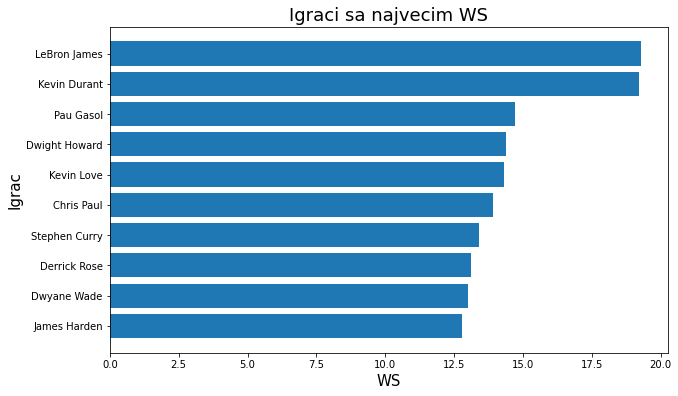

In [18]:
# Prikaz igraca sa najvecim WS
plt.figure(figsize=(10,6))
plt.barh("Player", "WS",data=df.sort_values('WS',ascending=False).head(20))
plt.xlabel("WS", size=15)
plt.ylabel("Igrac", size=15)
plt.title("Igraci sa najvecim WS", size=18)
plt.gca().invert_yaxis()

plt.show()

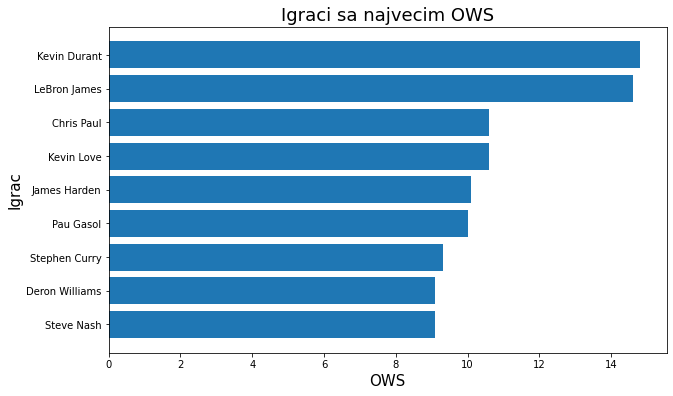

In [19]:
# Prikaz igraca sa najvecim OWS (ofanzivnim)
plt.figure(figsize=(10,6))
plt.barh("Player", "OWS",data=df.sort_values('OWS',ascending=False).head(20))
plt.xlabel("OWS", size=15)
plt.ylabel("Igrac", size=15)
plt.title("Igraci sa najvecim OWS", size=18)
plt.gca().invert_yaxis()

plt.show()

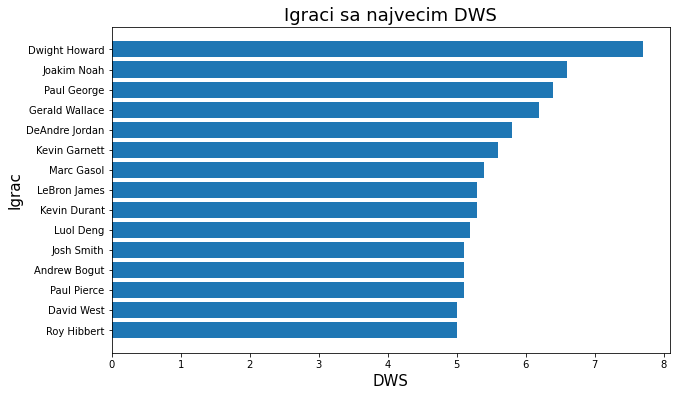

In [20]:
# Prikaz igraca sa najvecim DWS (defanzivnim)
plt.figure(figsize=(10,6))
plt.barh("Player", "DWS",data=df.sort_values('DWS',ascending=False).head(20))
plt.xlabel("DWS", size=15)
plt.ylabel("Igrac", size=15)
plt.title("Igraci sa najvecim DWS", size=18)
plt.gca().invert_yaxis()

plt.show()

In [27]:
# Kreiranje linearnog modela
# TODO objasniti ove statove
X = df[['PER','TS%','MP','ORB%','DRB%','TRB%','VORP','BPM', 'ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%']]
y = df['WS']

# procenat (0.3 = 30%) dataseta koji ce se koristiti unutar test podskupa
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test, random_state=100)

In [32]:
# skaliranje do datih vrednosti - opseeg [0, 1]
scale = MinMaxScaler()
model = LinearRegression()

# standardizacija atributa (uklanjanje srednje vrednosti (0), standardna devijacija - 1)
X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.fit_transform(X_test)
# X_train_sc

In [45]:
# TODO objasniti koeficijente, npr. negativan uticaj (-9.36...) (?!) za ofanzivne skokove
# uporediti sa Top WS igracima, mnogi nemaju previse ofanzivnih skokova
model.fit(X_train_sc, y_train)

model.coef_

array([ 4.24855626e+00,  2.39580405e+00,  3.52917272e+00, -9.36499021e+13,
       -4.02943735e+13,  1.56337213e+12,  1.82732547e+01, -4.47497232e+00,
        9.36499021e+13,  4.02943735e+13, -1.56337213e+12, -6.47222645e-01,
       -1.13519791e+00, -8.97336034e-01, -4.80558195e-01])

In [46]:
predict = model.predict(X_test_sc)

# TODO pitati za ovo... varijacije u odnosu na predvijenu srednju vrednost?
print(mean_squared_error(y_test, predict))

0.7126278449713863


In [52]:

print(mean_absolute_error(y_test, predict)) 

0.6660169242613602


In [53]:
predict[0:10]

array([ 2.11019265,  1.33728341, -0.98731113, -1.36248378,  7.21970313,
        0.23836038,  1.83478926,  3.30197417,  4.05773677,  0.25706097])

In [54]:
y_test[0:10]

15977    3.2
14483    1.7
14003    0.0
14564    0.5
14754    6.2
13923    0.6
14791    2.3
14336    3.7
15401    4.9
14900    1.3
Name: WS, dtype: float64

In [50]:
# dobar score
print(explained_variance_score(y_test, predict, multioutput='raw_values'))

[0.92149767]


In [51]:
# dobar r2_score
print(r2_score(y_test, predict))

0.9101660619477369


### Klasifikacija

In [65]:
# Ponovo ucitavam da bih uzeo sve podatke
df = pd.read_csv('NBA_Season_Data.csv')

pd.set_option('display.max_rows', 109)
df.dtypes

Year                     int64
Tm                      object
Player                  object
Age                      int64
G                        int64
MP                       int64
PER                    float64
TS%                    float64
3PAr                   float64
FTr                    float64
ORB%                   float64
DRB%                   float64
TRB%                   float64
AST%                   float64
STL%                   float64
BLK%                   float64
TOV%                   float64
USG%                   float64
.                      float64
OWS                    float64
DWS                    float64
WS                     float64
WS/48                  float64
..1                    float64
OBPM                   float64
DBPM                   float64
BPM                    float64
VORP                   float64
OWS/48                 float64
DWS/48                 float64
Shot%                  float64
Player ID               object
Team Mar

In [67]:
# samo igraci koji imaju minimum 20 utakmica
df = df[(df["G"] > 20)]
df.dropna

<bound method DataFrame.dropna of        Year   Tm              Player  ...  Weight  Rounded Position  Rounded Age
0      1978  NOJ      Truck Robinson  ...   225.0               4.0         26.0
1      1978  BUF         Randy Smith  ...   180.0               1.0         29.0
2      1978  WSB         Elvin Hayes  ...   235.0               4.0         32.0
3      1978  BOS         Dave Cowens  ...   230.0               4.0         29.0
4      1978  NYK          Bob McAdoo  ...   210.0               4.0         26.0
...     ...  ...                 ...  ...     ...               ...          ...
16767  2015  LAC       Dahntay Jones  ...   225.0               3.0         34.0
16771  2015  CLE     Brendan Haywood  ...   268.0               5.0         35.0
16772  2015  UTA         Steve Novak  ...   225.0               4.0         32.0
16773  2015  MIN  Glenn Robinson III  ...   222.0               3.0         21.0
16781  2015  LAC         C.J. Wilcox  ...   195.0               2.0        

In [68]:
# izbacivanje odredjenih atributa
# TODO eksperimentisati ovde...
features = [x for x in df.columns if x not in ['Player', 'Tm', 'Player ID', 'Age', 'column_s', 'column_s', '%Min', 'Production', 'Prod-Gm', 'TrueSalary', 'Adjusted Production']]

y = df.loc[:, ['Player']].values

# uzimanje samo numerickih vrednosti
df = df.select_dtypes(include=[np.number])

x = df.loc[:, features].values

In [69]:
x = StandardScaler().fit_transform(x)
x = np.nan_to_num(x)

In [97]:
# svodjenje 100+ feature-a na dve dimenzije
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

# https://www.basketball-reference.com/about/glossary.html
# TODO eksterimentisati sa drugim atributom
final = pd.concat([principalDf, df[['Rounded Position', 'WORP']], data['Player']], axis=1)
final = final[['Player', 'Rounded Position', 'WORP', 'pc1', 'pc2']]
final.columns = ['Player', 'Rounded Position', 'WORP', 'pc1', 'pc2']

In [98]:
# koliko koji feature utice u  svakoj dimenziji
# TODO pitati sta raditi kada neki feature utice previse, a "intuitivno" nije toliko bitan
temp1 = pd.DataFrame(data={'pc':features,'imp':pca.components_[0]})
temp1

,pc,imp
0,Year,-0.002465
1,G,0.082988
2,MP,0.129073
3,PER,0.137841
4,TS%,0.098714
5,3PAr,0.015487
6,FTr,0.019261
7,ORB%,-0.007546
8,DRB%,0.014667
9,TRB%,0.007154


In [99]:
temp2 = pd.DataFrame(data={'pc':features,'imp':pca.components_[1]})
temp2

,pc,imp
0,Year,0.003624
1,G,0.004045
2,MP,-0.013470
3,PER,-0.012962
4,TS%,-0.009467
5,3PAr,-0.111327
6,FTr,0.075605
7,ORB%,0.170650
8,DRB%,0.187264
9,TRB%,0.194565


In [100]:
# koliki procenat varijanse je uzet u obzir u transformisanom modelu (55% je malo)
pca.explained_variance_ratio_.cumsum()

array([0.38290197, 0.55399511])

In [101]:
# smanjivanje dimenzionalnosti tako da objasni 99% varijanse
pca = PCA(n_components=0.99)
pca.fit(x)
principalComponents = pca.transform(x)

principalComponents.shape

(13424, 27)

In [102]:
# provera, dobro
pca.explained_variance_ratio_.sum()

0.9907622013284172

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Text(0.5, 1.0, 'bayesian information criterion metoda')

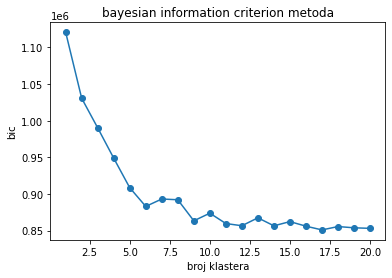

In [81]:
# nalazenje optimalnog broja klastera (k) za Gaussian mixture model
# model je nenadgledanog tipa, pretpostavlja da postoji odredjeni broj Gausovskih distribucija, od kojih svaka predstavlja jedan klaster
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalComponents)
          for n in n_components]

plt.plot(n_components, [m.bic(principalComponents) for m in models], label='BIC')
plt.scatter(n_components, [m.bic(principalComponents) for m in models])
plt.xlabel('broj klastera')
plt.ylabel('bic')
plt.title('bayesian information criterion metoda')

In [103]:
# na osnovu prethodnog dela, uzimam broj komponenti 9 (TODO iako nije idealno, trebalo bi srediti atribute)
gmm = GaussianMixture(n_components=9).fit(principalComponents)
labels = gmm.predict(principalComponents)
df['cluster'] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


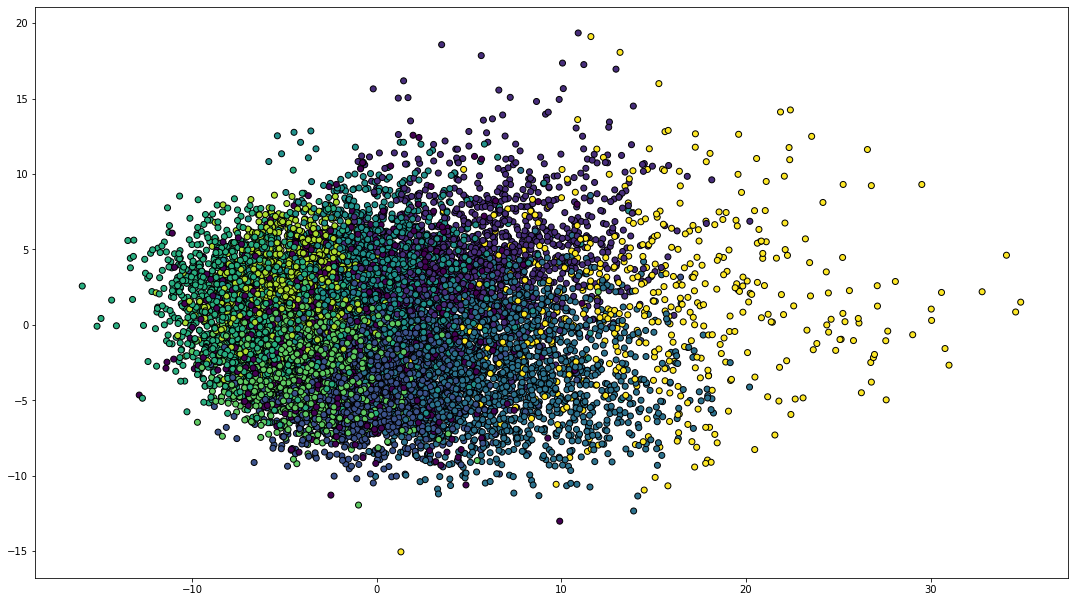

In [104]:
plt.gcf().set_size_inches(18.5, 10.5)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels, cmap='viridis', edgecolor='black')

In [105]:
# broj vrednosti u svakom klasteru
df.cluster.value_counts()

3    2024
2    1971
4    1857
7    1722
5    1669
1    1584
6    1515
0     619
8     463
Name: cluster, dtype: int64

In [168]:
# trazim neke "tipicne" igrace i pokusavam da "imenujem" klastere (ovo je subjektivno) :)
# ponovo ucitati originalni data zbog kolone Player
data.loc[data["Player"] == "Vlade Divac"]

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,.,OWS,DWS,WS,WS/48,..1,OBPM,DBPM,BPM,VORP,OWS/48,DWS/48,Shot%,Player ID,Team Mar,Team MP,Team Gm,Year 3PAr,Team TS%,Tm USG,Tm TS W/O Plyr,Reb/Vers,...,DStdErr,Dcontrib,DVORP,Sum SPM,%Min.1,MPG.1,ReMPG,BPM.2,Contrib.2,VORP.2,VORP-Gm,O-BPM,Ocontrib.1,OVORP.1,OVORP-Gm,D-BPM,Dcontrib.1,DVORP.1,DVORP-Gm,Production,Prod-Gm,Exp BPM,TrueTalentBPM,Exp%Min,TrueTalentVORP,TrueSalary,TrueTimeVORP,Adjusted Production,WORP,O-WORP,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
4316,1990,LAL,Vlade Divac,21,82,1611,17.5,0.544,0.009,0.393,12.3,23.7,18.2,6.7,2.4,4.2,14.6,20.0,NaN,1.7,3.2,5.0,0.148,NaN,-0.8,2.3,1.5,1.4,0.052,0.096,17.1,divacvl01,7.03,19855,82,0.076,0.562,344733,0.564,-0.64,...,1.6,1.0,1.1,-3.5,0.4,19.6,18.7,1.5,0.6,1.4,1.4,-1.0,-0.4,0.3,0.3,2.5,1.0,1.1,1.1,"$7,300,000","$7,300,000",-0.6,0.5,0.58,1.4,"$7,400,000",2.0,"$10,000,000",3.8,0.8,3.1,5.5,5.0,5.0,22.0,0.0,85.0,243.0,5.0,22.0
4662,1991,LAL,Vlade Divac,22,82,2310,17.7,0.606,0.022,0.438,10.8,22.2,16.7,5.8,2.3,3.3,16.1,17.1,NaN,3.6,4.8,8.3,0.173,NaN,0.4,3.1,3.5,3.2,0.074,0.099,14.3,divacvl01,6.93,19830,82,0.082,0.551,344499,0.545,-1.47,...,1.6,2.0,2.1,-3.1,0.6,28.2,26.9,3.7,2.2,3.3,3.3,0.3,0.2,1.2,1.2,3.4,2.0,2.1,2.1,"$16,000,000","$16,000,000",1.1,2.5,0.73,3.3,"$15,700,000",4.1,"$19,600,000",9.0,3.2,5.8,11.2,5.0,5.0,23.0,1.0,85.0,243.0,5.0,23.0
5218,1992,LAL,Vlade Divac,23,36,979,15.9,0.553,0.060,0.353,10.0,18.9,14.4,9.5,2.9,2.2,19.4,20.3,NaN,0.4,1.5,1.8,0.090,NaN,-0.6,1.9,1.3,0.8,0.018,0.072,16.4,divacvl01,-1.02,19830,82,0.088,0.516,348755,0.514,0.23,...,1.8,0.5,0.6,-2.8,0.2,27.2,24.5,1.2,0.3,0.8,1.8,-0.8,-0.2,0.2,0.5,2.0,0.5,0.6,1.3,"$4,700,000","$9,400,000",-0.5,0.3,0.55,1.3,"$6,800,000",1.8,"$9,200,000",2.2,0.6,1.6,4.8,5.0,5.0,24.0,2.0,85.0,243.0,5.0,24.0
5479,1993,LAL,Vlade Divac,24,82,2525,17.1,0.542,0.092,0.416,9.8,23.2,16.5,13.6,2.5,3.4,18.1,20.0,NaN,1.5,4.1,5.6,0.107,NaN,0.0,3.0,3.1,3.2,0.029,0.078,16.4,divacvl01,-1.31,19830,82,0.104,0.533,342706,0.532,1.88,...,1.6,2.1,2.3,-3.5,0.6,30.8,29.4,3.2,2.1,3.3,3.3,-0.1,-0.1,1.0,1.0,3.4,2.1,2.3,2.3,"$16,200,000","$16,200,000",0.5,1.9,0.73,2.9,"$14,100,000",3.8,"$18,300,000",9.0,2.7,6.3,10.2,5.0,5.0,25.0,3.0,85.0,243.0,5.0,25.0
5884,1994,LAL,Vlade Divac,25,79,2685,18.8,0.546,0.053,0.339,10.9,24.0,17.2,17.2,1.7,2.6,15.7,19.1,NaN,4.2,3.2,7.4,0.132,NaN,1.5,2.0,3.5,3.7,0.075,0.057,16.1,divacvl01,-4.04,19755,82,0.117,0.503,344516,0.497,3.37,...,1.5,1.6,1.8,-0.8,0.7,34.0,32.3,3.8,2.6,3.9,4.1,1.5,1.0,2.2,2.2,2.3,1.6,1.8,1.8,"$19,100,000","$19,800,000",0.7,2.4,0.73,3.2,"$15,600,000",4.2,"$20,300,000",10.6,5.8,4.8,11.3,5.0,5.0,26.0,4.0,85.0,243.0,5.0,26.0
6311,1995,LAL,Vlade Divac,26,80,2807,20.5,0.568,0.055,0.399,10.3,22.4,16.3,18.0,2.0,4.3,15.4,20.4,NaN,5.3,4.2,9.5,0.162,NaN,1.7,3.1,4.8,4.8,0.090,0.072,17.3,divacvl01,-0.01,19905,82,0.188,0.538,344382,0.534,3.68,...,1.5,2.5,2.7,-1.9,0.7,35.1,33.4,5.3,3.7,5.1,5.3,1.7,1.2,2.4,2.4,3.6,2.5,2.7,2.8,"$24,500,000","$25,100,000",1.5,3.5,0.73,4.0,"$19,400,000",5.3,"$25,100,000",13.8,6.4,7.4,14.2,5.0,5.0,27.0,5.0,85.0,243.0,5.0,27.0
6785,1996,LAL,Vlade Divac,27,79,2470,17.4,0.544,0.022,0.366,9.5,22.2,16.0,16.3,1.6,3.7,17.5,20.6,NaN,2.2,4.0,6.1,0.119,NaN,-0.1,2.8,2.8,3.0,0.042,0.077,17.0,divacvl01,4.36,19680,82,0.200,0.555,341574,0.556,2.90,...,1.6,1.9,2.1,-3.4,0.6,31.3,29.8,2.8,1.8,3.0,3.1,-0.3,-0.2,0.9,0.9,3.1,1.9,2.1,2.2,"$14,500,000","$15,000,000",1.4,2.1,0.73,3.0,"$14,400,000",3.5,"$16,600,000",8.1,2.4,5.8,9.4,5.0,5.0,28.0,6.0,85.0,243.0,5.0,28.0
7246,1997,CHH,Vlade Divac,28,81,2840,17.9,0.533,0.055,0.306,10.6,20.0,15.5,17.5,2.0,4.7,16.7,19.1,NaN,3.4,3.9,7.3,0.123,NaN,0.9,3.6,4.5,4.6,0.057,0.066,15.9,divacvl01,2.37,19805,82,0.212,0.562,339315,0.566,3.59,...,1.5,2.9,3.1,-3.3,0.7,35.1,33.4,4.7,3.4,4.8,4.9,0.7,0.5,1.7,1.8,4.0,2.9,3.1,3.1,"$22,600,000","$22,800,000",1.9,3.4,0.73,3.9,"$18,600,000",4.9,"$22,800,000",13.0,4.7,8.3,13.1,5.0,5.0,

In [169]:
# primecuje se da igrac pripada drugim klasterima iz sezone u sezonu, sto i ima smisla 
# (prve sezone, promena tima, povrede uticu na stil igre), ali otezava klasifikovanje role
print(df.loc[[4316, 4662, 5218, 5479, 5884, 6311, 6785, 7246, 7845, 8233, 8756, 9220, 9705, 10179, 10643], 'cluster'])

4316     4
4662     1
5218     4
5479     1
5884     1
6311     1
6785     1
7246     1
7845     1
8233     8
8756     1
9220     1
9705     1
10179    1
10643    3
Name: cluster, dtype: int64


In [172]:
# drugi pristup, sada bi trebalo izdvojiti zajednicke karakteristike i definisati rolu
df.loc[df["cluster"] == 0]
print(data.loc[[8215, 8223, 8235	, 8241, 8244, 15128	, 15134	, 15138, 15142, 15152	], 'Player'])

8215      Antonio McDyess
8223       Jason Williams
8235           Mike Bibby
8241            Eric Snow
8244     Damon Stoudamire
15128       Lazar Hayward
15134      Vernon Macklin
15138    Brian Scalabrine
15142      Trey Thompkins
15152       Jerome Jordan
Name: Player, dtype: object


In [187]:
# print(data.loc[data["Player"] == "Kobe Bryant"])
# print(data.loc[data["Player"] == "LeBron James"])
# print(data.loc[data["Player"] == "Michael Jordan"])
print(df.loc[[7412, 7821, 8217, 8742, 9192, 9653, 10110, 10633, 11120, 11612, 12119, 12610, 13148, 13670, 14179, 14709, 15217], 'cluster'])
print(df.loc[[10572, 11082, 11609, 12118, 12618, 13137, 13656, 14162, 14708, 15229, 15229, 15743, 16311, 16311, 1689], 'cluster'])
print(df.loc[[2330, 3024, 3381, 3761, 4158, 4592, 5002, 5432, 6724, 7219, 7721, 9742, 10129], 'cluster'])
# iz sledeceg mozemo da zakljucim da su Kobe Bryant, Michael Jordan i Lebron James za veci broj sezona klasifikovani u isti cluster, da je broj igraca u klasteru manji
# mogli bi smo da stavimo label "Legend"
# TODO zavrsiti klasifikovanje

7412     6
7821     3
8217     8
8742     3
9192     3
9653     8
10110    8
10633    3
11120    3
11612    8
12119    8
12610    8
13148    8
13670    3
14179    3
14709    8
15217    8
Name: cluster, dtype: int64
10572    3
11082    8
11609    8
12118    8
12618    8
13137    8
13656    8
14162    8
14708    8
15229    8
15229    8
15743    8
16311    8
16311    8
1689     3
Name: cluster, dtype: int64
2330     8
3024     8
3381     8
3761     8
4158     8
4592     8
5002     8
5432     8
6724     8
7219     8
7721     8
9742     1
10129    1
Name: cluster, dtype: int64
